<h1> Training van het model lineaire regressie </h1>

In [1]:
import os
os.chdir(r'C:\Users\marcr\MakeAIWork3\projects\healthapp\src')
import models.train_model as tm
import data.make_dataset as md
import data.database as db
import visualization.visualize as vs
from matplotlib import pyplot as pp

<h2> Een 

In [25]:
colnames

['exercise', 'smoking', 'bmi', 'sugar', 'alcohol', 'lifespan']

['exercise', 'smoking', 'bmi', 'sugar', 'alcohol']


C:\Users\marcr\MakeAIWork3\projects\healthapp\src\visualization\visualize.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pp.gcf().show()


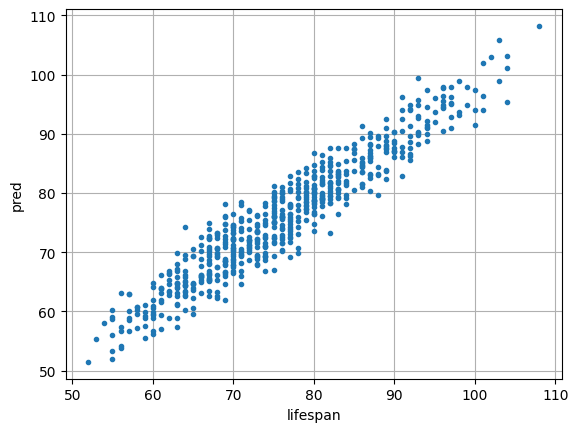

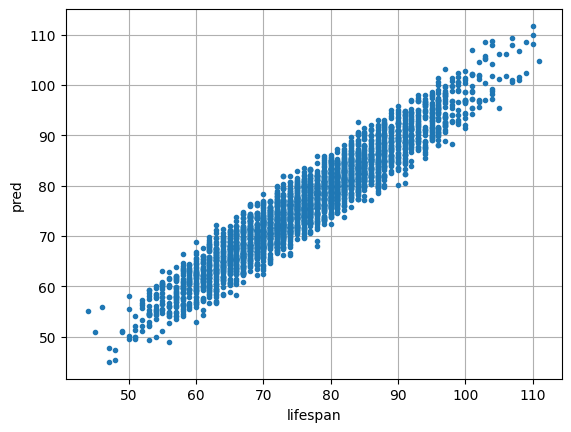

In [31]:
colnames = ["exercise","smoking","bmi","sugar","alcohol", "lifespan"]
dfstat = db.dbdata2df(colnames)


yparam = 'lifespan'
xparam = colnames[:-1]

def makeregrmodel(xparam,yparam):
    colnames = xparam.copy()
    colnames.append(yparam)
    print(xparam)
    dfstat = db.dbdata2df(colnames)
    dftest, dftrain = md.Preprocess(dfstat).split_data()
    fitresult = tm.Modeltrainer(xparam=xparam, yparam=yparam).lineairregr(dftrain)
    dftest["pred"] = fitresult.predict(dftest[xparam])
    dftrain["pred"] = fitresult.predict(dftrain[xparam])
    return dftest,dftrain,fitresult

dftest,dftrain,fitresult = makeregrmodel(xparam,yparam)

vs.Descrstats().plot_xygraph(dftest, "lifespan", "pred")
pp.grid()
#vs.Descrstats().plot_xygraph(dftest, "", "lifespan")
vs.Descrstats().plot_xygraph(dftrain, "lifespan", "pred")
pp.grid()
#pp.grid()




<h3> Hoe veranderd de r-kwadraat als ik de factoren één voor één toevoeg? 

In [ ]:
colnames = ["exercise","smoking","bmi","sugar","alcohol", "genetic","lifespan"]
xparam = []

for col in colnames[0:-1]:
    print(col)
    xparam.append(col)
    dftest,dftrain,fitresult = makeregrmodel(xparam,yparam)
    dir(fitresult)
    print('\tr^2:'+'{:.3}'.format(fitresult.score(dftest[xparam],dftest['lifespan']) ))


exercise
['exercise']
	r^2:0.44
smoking
['exercise', 'smoking']
	r^2:0.71
bmi
['exercise', 'smoking', 'bmi']
	r^2:0.796
sugar
['exercise', 'smoking', 'bmi', 'sugar']
	r^2:0.857
alcohol
['exercise', 'smoking', 'bmi', 'sugar', 'alcohol']
	r^2:0.908
genetic
['exercise', 'smoking', 'bmi', 'sugar', 'alcohol', 'genetic']
	r^2:0.93


Dit is wel ok. Kijken of ik een correlatiematrix kan maken..

<AxesSubplot: >

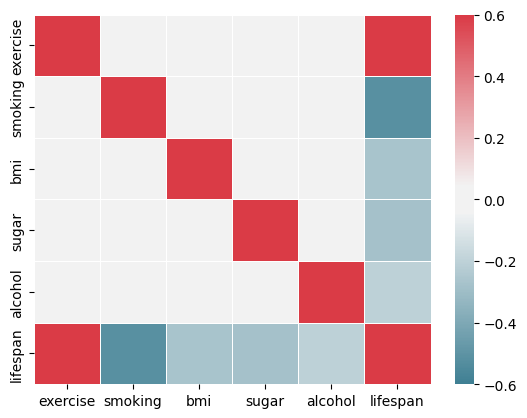

In [33]:
import seaborn as seab

corr = dfstat.corr('spearman')
cmap = seab.diverging_palette(220, 10, as_cmap=True, sep=20)
# Draw the heatmap with the mask and correct aspect ratio
seab.heatmap(corr, cmap=cmap,vmin=-0.6, vmax=0.6, center=0, linewidths=.5)



In [14]:
yparam

'smoking'

In [37]:
dftest

,bmi,smoking,pred
553,29.7,0.0,9.740620
3731,25.4,2.0,9.618668
3241,21.1,11.0,9.496716
2334,26.0,2.0,9.635685
3880,19.3,22.0,9.445666
...,...,...,...
1930,18.6,15.0,9.425813
1379,23.7,20.0,9.570454
876,17.2,12.0,9.386108
2897,28.4,17.0,9.703751


In [ ]:
dftest[col]

In [42]:
dftest[yparam]

553      0.0
3731     2.0
3241    11.0
2334     2.0
3880    22.0
        ... 
1930    15.0
1379    20.0
876     12.0
2897    17.0
314     21.0
Name: smoking, Length: 615, dtype: float64

In [46]:
colnames = ["exercise","smoking"]
colnames = ["bmi","sugar"]
xparam = []
yparam = 'smoking'
#for col in colnames:
#print(col)
#xparam [col]
dftest,dftrain,fitresult = makeregrmodel(colnames,yparam)
fitresult.predict(dftest[colnames])
#dir(fitresult)
print('\tr^2:'+'{:.3}'.format(fitresult.score(dftest[colnames],dftest[yparam]) ))

['bmi', 'sugar']
	r^2:-0.0047


Conclusie: niks is het met onderling aan elkaar gecorreleerd. 